<a href="https://colab.research.google.com/github/2796gaurav/Hands-OnStockMarketPrediction/blob/main/2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression

In [1]:
# install dependencies


!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# sample input data

x= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y = np.array([1,2.4,3.2,4.2,5.1,6.5,7.2,8.1,9.3,10.3,11.4,12.2,13.4,14.3])
y = np.array([6,2,4,9,6,33,56,22,66,88,67,56,89,77])

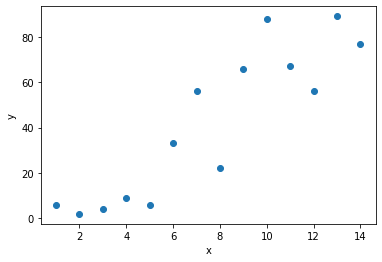

In [4]:
# visualize the data

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
x = x.reshape((-1, 1))

# formula -> y=mx+c
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [6]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -11.72527472527473
slope: [7.0967033]


In [8]:
# prediction
x_test = np.array([15,16,17,18,19,20,21,22,23,24,25,26]).reshape((-1, 1))

y_pred = model.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 94.72527473 101.82197802 108.91868132 116.01538462 123.11208791
 130.20879121 137.30549451 144.4021978  151.4989011  158.5956044
 165.69230769 172.78901099]


In [9]:
x_all = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
y_all = model.intercept_ + model.coef_ * x_all

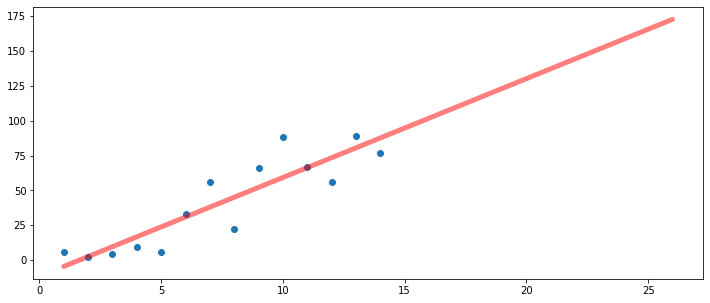

In [11]:

plt.figure(figsize=(12,5))
plt.scatter(x, y, linewidths=1)
plt.plot(x_all, y_all, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')

In [12]:
# Prediction on stock market data

In [13]:
import yfinance as yf
import pandas as pd
import datetime as datetime

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [14]:
rel_data = yf.Ticker("RELIANCE.NS") 
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,3,19)
data = rel_data.history(start=start, end=end, auto_adjust=True)
data = data.reset_index()
data = data.sort_values('Date')
data = data[['Date','Close']]
data.head()

,Date,Close
0,2021-01-01,1981.126831
1,2021-01-04,1984.466064
2,2021-01-05,1959.795410
3,2021-01-06,1908.111694
4,2021-01-07,1905.021729


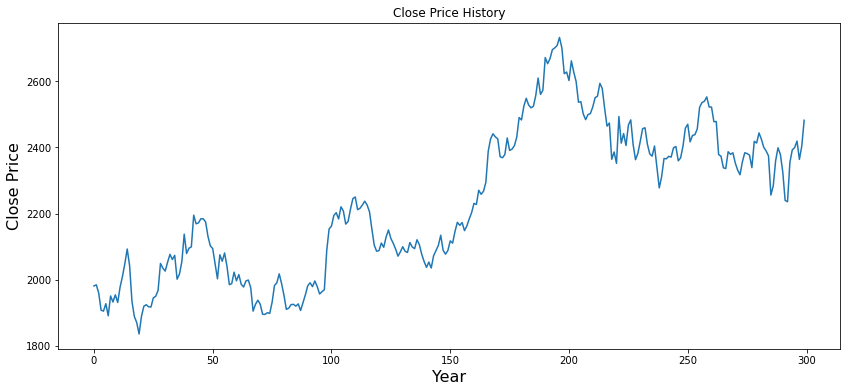

In [15]:
# plot the chart


plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Close Price' , fontsize=16)
plt.show()

In [16]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [17]:
## split train test data
lookback = 50

train_data = data[:-lookback]
test_data = data[-lookback:]

print(train_data.shape)
print(test_data.shape)

(250, 2)
(50, 2)


In [18]:
X_train, y_train = create_features(train_data, label='Close')
X_test, y_test = create_features(test_data, label='Close')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(250, 8)
(250,)
(50, 8)
(50,)


In [19]:
X_train.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,4,1,1,2021,1,1,53
1,0,0,1,1,2021,4,4,1
2,0,1,1,1,2021,5,5,1
3,0,2,1,1,2021,6,6,1
4,0,3,1,1,2021,7,7,1


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -989600.8366819036
slope: [ 0.00000000e+00  2.41663894e-01 -1.95232831e+01 -1.81541425e+03
  4.91526146e+02  6.15451705e+01 -6.15520176e+01  7.84902657e-01]


In [23]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/602/1*UtN6F3akfoF4HwvQGDgShg.png")

In [24]:
# prediction

test_data['pred_Close'] = model.predict(X_test)
test_data.head()

,Date,Close,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,pred_Close
250,2022-01-05,2469.600098,0,2,1,1,2022,5,5,1,2431.327323
251,2022-01-06,2416.500000,0,3,1,1,2022,6,6,1,2431.562140
252,2022-01-07,2436.000000,0,4,1,1,2022,7,7,1,2431.796956
253,2022-01-10,2438.000000,0,0,1,1,2022,10,10,2,2431.594662
254,2022-01-11,2455.550049,0,1,1,1,2022,11,11,2,2431.829479


In [27]:
# metrics

rmse = mean_squared_error(model.predict(X_test),y_test ,squared=False)
rmse

123.85737536004902

In [26]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20200622171741/RMSE1.jpg")

In [54]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=train_data.Date, y=train_data.Close,
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=test_data.Date, y=test_data.Close,
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=test_data.Date, y=test_data.pred_Close,
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
    ),
    showlegend=True,
    #template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (linear regression)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()